In [1]:
from dataset import get_loader
from utils import plot_batch

In [2]:
from pathlib import Path

In [3]:
celeb_path = Path('./data/CelebA')
train_path = celeb_path / 'train'
test_path = celeb_path / 'test'
val_path = celeb_path / 'validation'

In [4]:
img_size = 224
batch_size = 2
learning_rate = 1e-8

In [5]:
train_loader = get_loader(
    path=train_path,
    img_size=img_size,
    batch_size=batch_size,
    image_limit=2,
    augment=True
)

In [6]:
val_loader = get_loader(
    path=val_path,
    img_size=img_size,
    batch_size=batch_size,
    image_limit=2,
    augment=True
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9665205..2.6303186].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9657679..2.64].


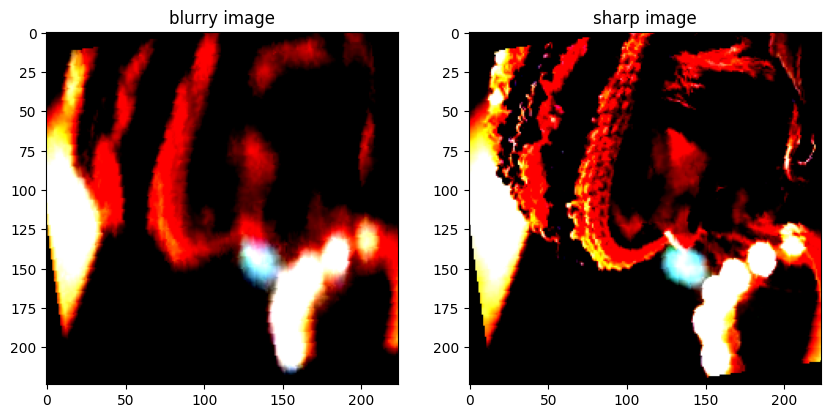

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6600171..2.2012782].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6515299..2.2458246].


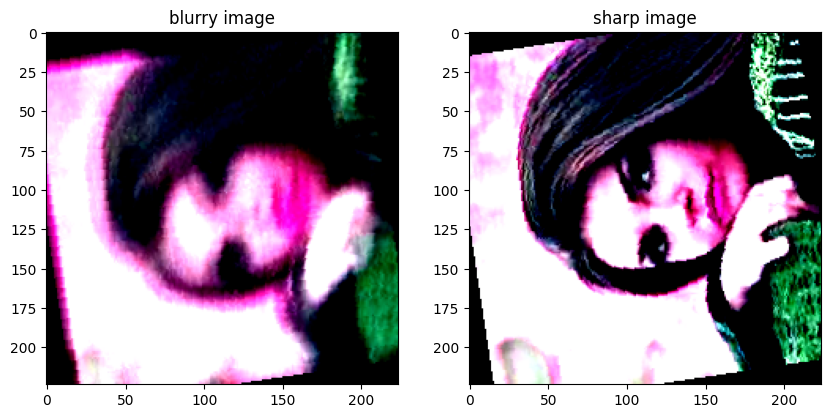

In [7]:
plot_batch(train_loader, batch_index=0)

In [8]:
from cnn import get_model

In [9]:
model = get_model(model_id='resnet50', img_size=img_size)

In [10]:
from trainer import Trainer

In [11]:
import torch.nn as nn
import torch

In [12]:
mse = nn.MSELoss()

In [13]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [14]:
trainer = Trainer(
    model=model,
    optimizer=optimizer,
    criterion=mse,
    debug=True,
    debug_step=5
)

In [15]:
Trainer.supported_models()

['resnet50', 'resnet101', 'resnet152', 'inception_v3']

Starting Epoch 1 of 5.


100%|██████████| 1/1 [00:00<00:00, 32.16batch/s]


Epoch: 1, Train loss: 3.7923, Validation loss: 3.3734
Starting Epoch 2 of 5.


100%|██████████| 1/1 [00:00<00:00, 35.97batch/s]


Epoch: 2, Train loss: 3.2420, Validation loss: 3.2987
Starting Epoch 3 of 5.


100%|██████████| 1/1 [00:00<00:00, 35.89batch/s]


Epoch: 3, Train loss: 2.7629, Validation loss: 2.7337
Starting Epoch 4 of 5.


100%|██████████| 1/1 [00:00<00:00, 36.47batch/s]


Epoch: 4, Train loss: 2.4916, Validation loss: 2.7672
Starting Epoch 5 of 5.


  0%|          | 0/1 [00:00<?, ?batch/s]

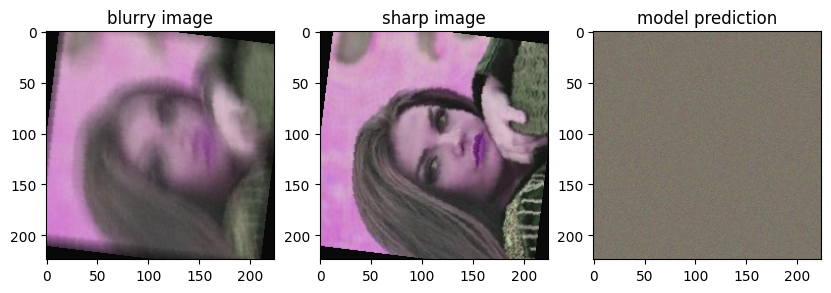

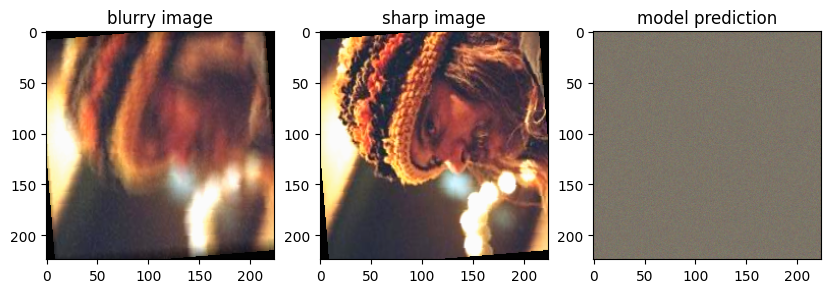

100%|██████████| 1/1 [00:00<00:00, 36.42batch/s]

Epoch: 5, Train loss: 2.5949, Validation loss: 3.3321


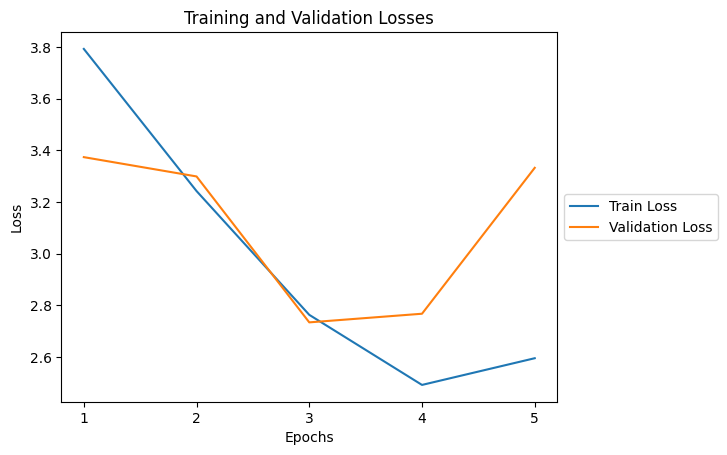

In [16]:
trainer.train(
    train_loader=train_loader,
    val_loader=val_loader,
    epochs=5
)